In [201]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import chi2
from scipy.special import psi
from math import log

from scipy.stats import gamma
from scipy.stats import lognorm
from fitter import Fitter

In [468]:
data_ff = pd.read_csv('D:/thesis_data/VEG_INDICES/samples/stratified/florestal/20m/FF_20170112_20m_patches.csv')
data_fs = pd.read_csv('D:/thesis_data/VEG_INDICES/samples/stratified/savanica/20m/FS_20170112_20m_patches.csv')

In [414]:
data

,dprvi_patch_0,prvi_patch_0,dpsvi_patch_0,dpsvim_patch_0,rvi_patch_0,dprvi_patch_1,prvi_patch_1,dpsvi_patch_1,dpsvim_patch_1,rvi_patch_1,...,dprvi_patch_48,prvi_patch_48,dpsvi_patch_48,dpsvim_patch_48,rvi_patch_48,dprvi_patch_49,prvi_patch_49,dpsvi_patch_49,dpsvim_patch_49,rvi_patch_49
0,0.556535,0.007414,0.049773,0.019418,0.775979,0.411076,0.004399,0.039214,0.075546,0.406262,...,0.574364,0.010854,0.078160,0.012210,1.203301,0.463942,0.006597,0.032002,0.052292,0.389232
1,0.526675,0.007200,0.060936,0.017336,0.926084,0.529943,0.006182,0.045640,0.061099,0.493466,...,0.677940,0.014767,0.062562,0.015271,0.980398,0.400271,0.005608,0.026978,0.086962,0.281638
2,0.369024,0.003325,0.071545,0.021325,0.965769,0.575657,0.007817,0.052219,0.026303,0.726212,...,0.693649,0.015741,0.075869,0.024362,0.963613,0.307337,0.004334,0.030248,0.101108,0.295932
3,0.538555,0.007461,0.070252,0.025524,0.902676,0.555154,0.008216,0.060951,0.010208,1.090134,...,0.697968,0.015040,0.092468,0.027385,1.056085,0.323744,0.005079,0.034887,0.093234,0.343511
4,0.785722,0.019455,0.136386,0.026427,1.338173,0.451033,0.007230,0.057636,0.010192,1.052907,...,0.694370,0.014515,0.095878,0.021566,1.156294,0.541635,0.010746,0.047220,0.065732,0.494859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.441925,0.006842,0.101243,0.029295,1.095463,0.443053,0.007391,0.108756,0.026914,1.171216,...,0.421842,0.002282,0.032019,0.007677,0.774163,0.645708,0.005194,0.037539,0.004046,1.065303
396,0.565665,0.009977,0.095050,0.040126,0.961003,0.432088,0.005999,0.092050,0.027883,1.047590,...,0.468162,0.003109,0.040705,0.006795,0.953039,0.578779,0.004867,0.068499,0.005226,1.409848
397,0.702413,0.013567,0.064817,0.034626,0.775481,0.408019,0.004156,0.056539,0.017705,0.874427,...,0.499618,0.003775,0.027839,0.006977,0.722576,0.670447,0.006915,0.062925,0.008150,1.187866
398,0.720219,0.013041,0.049877,0.036822,0.627066,0.523235,0.005211,0.041712,0.009271,0.875672,...,0.520708,0.004303,0.033060,0.007561,0.796354,0.749465,0.009184,0.042244,0.031438,0.582741


In [491]:
data_p = data_ff['dpsvim_patch_0']
data_q = data_fs['dpsvim_patch_0']

In [492]:
[a_p, loc_p, scale_p] = gamma.fit(data_p)
[a_q, loc_q, scale_q] = gamma.fit(data_q)

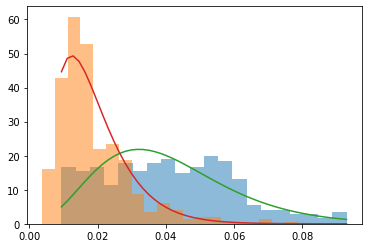

In [493]:
x = np.linspace(np.min(data_p), np.max(data_p))

plt.hist(data_p, bins=20, density=True, alpha=0.5)
plt.hist(data_q, bins=20, density=True, alpha=0.5)

plt.plot(x, gamma.pdf(x, a_p, loc_p, scale_p))
plt.plot(x, gamma.pdf(x, a_q, loc_q, scale_q))

In [494]:
kp = a_p
kq = a_q
thetap = scale_p
thetaq = scale_q

dskl = ((kp - kq) * (psi(kp) + log(thetap) - psi(kq) - log(thetaq)) + ((kp*thetap - kq*thetaq) * ((thetap - thetaq) / (thetap * thetaq)))) / 2

m = data_p.count()
n = data_q.count()
v = 1

s = ((2*m*n*v) / (m + n)) * dskl
 
p_value = chi2.sf(s, df=2)

if p_value <= 0.05:
    print('Reject H0')

Reject H0


In [495]:
(2*m*n*v) / (m + n)

400.0

In [496]:
dskl

2.196557929176438

In [497]:
p_value

1.619580113700372e-191

In [498]:
s

878.6231716705752